# **FERNANO DE FACIO ROSSETTI -  RA:20041208**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler



---


# **1)**
# **Implementação**


---



In [ ]:
# FUNCAO QUE RECEBE UMA LISTA DE PONTOS X E Y E CALCULA A DISTANCIA EUCLIDIANA ENTRE ELES
# OS PONTOS SÂO OS ATRIBUTOS
# A DISTANCIA É USADA NA FUNÇÃO DE BASE RADIAL
def distancia(x:list,y:list):
  dist = 0
  for i in range(len(x)):
    dist += (y[i]-x[i])**2
  #print(f'distancia: {dist}')
  return dist**(1/2)


In [ ]:
# RADIAL BASIS FUNCTION KERNE
# X E C SÃO UMA LISTA DE PONTOS (ATRIBUTOS) E SIGMA É O DESVIO PADRÃO
def radial_basis_function(x,c,sigma):
    return np.exp(-distancia(x,c)**2 / (2 * sigma**2))

Na aplicação prática do RBNN nas bases de dados será utlizado a função "normalized_rbf", conhecida como Função de Base Radial Gaussiana Normalizada <br><br>

\begin{align}
\quad G(x, c, \sigma) = \frac{1}{{\sigma \sqrt{2\pi}}} \exp\left(-\frac{{||x - c||^2}}{{2\sigma^2}}\right)
\end{align}


In [ ]:
# FUNCAO DE BASE RADIAL GAUSSIANA NORMALIZADA -> AREA SOB A CURVA IGUAL A 1
# X E C SÃO UMA LISTA DE PONTOS (ATRIBUTOS) E SIGMA É O DESVIO PADRÃO
def normalized_rbf(x,c,sigma):
  return (1/(sigma*np.sqrt(2*np.pi))) * radial_basis_function(x,c,sigma);

<h1> RBNN Classificador </h1>

A função recebe um conjunto de dados, um ponto novo a ser classificado e o desvio padrão. O atributo a ser predito(target) precisa estar na última coluna. O valor novo a ser previsto contempla todos os atributos menos o que será previsto. <br> <br>

A função calcula o quão próximo o novo ponto está em relação aos pontos da base utilizando uma gaussiana. Quanto mais próximo maior será o valor e vice-versa. Após calcular essa influência a função irá somar esta a um dicionario que irá conter a soma de todas as influências das determinadas classes. O processo é repetido para todos os pontos da base. Por fim, a classe cuja soma das influências for maior será a classe predita pelo classifcador


In [ ]:
def rbnnClassifier(dataset,newData,std_dev):
  classes = iris['species'].unique()
  dic = {classe: 0 for i, classe in enumerate(classes)}
  for index,row in dataset.iterrows():
    gaus = normalized_rbf(list(row)[:-1],newData.squeeze().tolist(),std_dev)
    dic[row.iloc[-1]]+=gaus

  #print(dic)
  pred = max(dic, key=lambda k: dic[k])
  return pred

<h1> RBNN Regressor </h1>

A função recebe um conjunto de dados, um ponto novo a ser classificado e o desvio padrão. O atributo a ser predito(target) precisa estar na última coluna. O valor novo a ser previsto contempla todos os atributos menos o que será previsto. <br> <br>

A função calcula o quão próximo o novo ponto está em relação aos pontos da base utilizando uma gaussiana. Quanto mais próximo, maior será o valor e vice-versa. Após calcular essa influência a função irá multiplicar esta pelo valor do atributo target do ponto. O processo é repetido para todos os pontos. Ao final de tudo, o resulta dessa conta anterior será divido pela soma das influências ponderadas de cada ponto (valor de retorna da função gaussiana). <br><br>

Sendo assim, se um ponto da base estiver próximo do novo ponto, o valor gerado pela gaussiana será alto, e ao multiplicar ele pelo seu valor do atributo target, este novo valor vai estar próximo do valor original, permitindo assim, o valor predito ir se moldando de acordo com os pontos da base



O valor predito é dado por:
<br><br>
\begin{align}
\frac{G(x_1,c,σ) \cdot x_{1_{target}} + G(x_2,c,σ) \cdot x_{2_{target}} + \ldots + G(x_n,c,σ) \cdot x_{n_{target}}}{G(x_1,c,σ) + G(x_2,c,σ) + \ldots + G(x_n,c,σ)}
\end{align}
<br>
Onde, '*Xi*' representa os pontos da base de dados e '*c*' representa o centro que será o novo ponto, onde seu atributo target será predito


In [ ]:
def rbnnRegressor(dataset,newData,std_dev):
  pred = 0;
  total_weight = 0
  for index,row in dataset.iterrows():
    gaus = normalized_rbf(list(row)[:-1],newData.squeeze().tolist(),std_dev)

    pred += (gaus*row[-1])
    total_weight += gaus

  return pred/total_weight





---


# **2)**
# **APLICAÇÃO**



---



# **IRIS**

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris_cols = list(iris.columns)
iris_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
scaler = StandardScaler()
iris_std = iris.copy()
iris_std[iris_cols[:-1]] = scaler.fit_transform(iris.iloc[:,:-1])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_std.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


Função para testar os resultados da RBNN Classifier <br>
**df** -> recebe os possiveis datafranes: <br>
iris <br>
iris_std <br>
**valores_teste** -> lista de indices do dataframe nos quais seu valor objetivo será predito <br>
**sigma** -> desvio padrão


In [ ]:
def resultadoClassificadorRBNN(df,valores_teste,sigma):
  acertos = 0
  for i in valores_teste:
    predicao = rbnnClassifier(pd.concat([df.iloc[0:i,:],df.iloc[i+1:len(df),:]],axis=0),
                             df.iloc[i:i+1,:-1],
                             sigma)
    esperado = df.iloc[i,-1]
    if (predicao==esperado):
      acertos+=1

    #print("OBTIDO: ", predicao, " ESPERADO: ",esperado)
  acuracia = acertos/len(valores_teste)
  #print("ACERTOS: ", acertos, "ACURACIA: ", acuracia)
  return {"acuracia":acuracia, "acertos":acertos}

Função para testar os resultados de predição e medição de acurácia do RBNN Classifier <br>
Foi utilizado validação cruzada (kfolds) passando sempre a base de treino

In [ ]:
def acuraciaResultadosClassificador(df,folds,sigma):
  kf = KFold(n_splits=folds,shuffle=True,random_state=100)
  media_total = 0
  resultados = []
  for i, (train_index, test_index) in enumerate(kf.split(df)):
    fold_result = {"fold": i}

    # retorna acuracia e acertos
    fold_result.update(resultadoClassificadorRBNN(df,train_index,sigma))
    media_total += fold_result["acuracia"]
    resultados.append(fold_result)

  media_total /= folds


  return {"media_total":media_total, "qtd_amostras_treino":len(train_index), "desvio_padrao": sigma,"resultados":resultados}

acuraciaResultadosClassificador(iris,5,0.1)

{'media_total': 0.96,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.1,
 'resultados': [{'fold': 0, 'acuracia': 0.95, 'acertos': 114},
  {'fold': 1, 'acuracia': 0.9583333333333334, 'acertos': 115},
  {'fold': 2, 'acuracia': 0.975, 'acertos': 117},
  {'fold': 3, 'acuracia': 0.9666666666666667, 'acertos': 116},
  {'fold': 4, 'acuracia': 0.95, 'acertos': 114}]}

<h3> Resultados Finais </h3>

Podemos perceber por diversos testes realizados, com pré-processamento da base dados, que o Radial Based Nearest Neighbors para classificação na base Iris, teve um funcionamento muito bom. Com valores relativamente baixos de desvio padrão, o algoritmo tem maior taxa de acertos e acurácia (com diversos testes, o melhor valor encontrado foi 0.1) . Além disso, percebmos que a base iris sem nenhuma padronização obteve resultados melhores
<br><br>


<h2 style="font_size=40;"> <b> ABALONE </b> </h2>

Iniciando a base

In [ ]:
col_names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone = pd.read_csv('abalone.data', names = col_names)

In [ ]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/--------------------------------------------------------------------------------
/--------------------------------------------------------------------------------
<br> CRIANDO DATAFRAME ABALONE SEM COLUNA CATEGÓRICA "SEX" COM E SEM PADRONIZACAO <br>
/--------------------------------------------------------------------------------
/--------------------------------------------------------------------------------


In [ ]:
abalone_no_sex = abalone.iloc[:,1:]
scaler = StandardScaler()
abalone_no_sex_std = abalone_no_sex.copy()
abalone_no_sex_std[col_names[1:-1]] = scaler.fit_transform(abalone_no_sex.iloc[:,:-1])

In [ ]:
abalone_no_sex.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone_no_sex_std.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7


/--------------------------------------------------------------------------------
/-------------------------------------------------------------------------------- <br>
CRIANDO DATAFRAME COM ENCODING DA COLUNA CATEGÓRICA 'SEX' COM E SEM PADRONIZAÇÃO <br>
/--------------------------------------------------------------------------------
/--------------------------------------------------------------------------------

In [ ]:
abalone_encoded = pd.get_dummies(abalone, columns=['Sex'])
cols = abalone_encoded.columns.tolist()
new_cols = cols[0:7] + cols[-3:len(cols)] + cols[7:8]
abalone_encoded = abalone_encoded[new_cols]

In [ ]:
abalone_encoded.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


In [ ]:
scaler = StandardScaler()
abalone_encoded_std = abalone_encoded.copy()
abalone_encoded_std[new_cols[:-1]] = scaler.fit_transform(abalone_encoded.iloc[:,:-1])


In [ ]:
abalone_encoded.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


In [ ]:
abalone_encoded_std.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488,7


Função para testar os resultados da RBNN Regressor <br>
**df** -> recebe os possiveis datafranes: <br>
abalone_encoded <br>
abalone_encoded_std <br>
abalone_no_sex <br>
abalone_no_sex_std <br>
**valores_teste** -> lista de indices do dataframe nos quais seu valor objetivo será predito <br>
**sigma** -> desvio padrão


Será utilizado o RMSE para avaliação do algorítmo (raiz quadrada do erro médio) <br>

 $RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big({\hat{y_i} -y_i}\Big)^2}}$

$\hat{y_i}$: valor predito <br>
$y_i$: valor real <br>
$n$: número de amostras

In [ ]:
def resultadoRegressorRBNN(df,valores_teste,sigma):
  RMSE = 0
  for i in valores_teste:
    predicao = rbnnRegressor(pd.concat([df.iloc[0:i,:],df.iloc[i+1:len(df),:]],axis=0),
                             df.iloc[i:i+1,:-1],
                             sigma)
    esperado = df.iloc[i,-1]
    RMSE += (predicao-esperado)**2
    #print("OBTIDO: ", predicao, " ESPERADO: ",esperado)
  RMSE = np.sqrt((RMSE/len(valores_teste)))
  return RMSE

Função para testar os resultados de predição e medição de acurácia do RBNN Regressor <br>
São escolhidos **qtd** valores aleatórios para cada número de **folds** com **sigma** de desvio padrão nos **df** datasets semelhantes citados acima

In [ ]:
def acuraciaResultadosRegressor(df,folds,sigma):
  kf = KFold(n_splits=folds,shuffle=True,random_state=100)
  rmse_medio = 0
  resultados = []
  for i, (train_index, test_index) in enumerate(kf.split(df)):
    fold_result = {"fold": i}
    rmse = resultadoRegressorRBNN(df,test_index,sigma)
    fold_result.update({'RMSE': rmse})
    rmse_medio += rmse
    resultados.append(fold_result)

  rmse_medio /= folds
  return {"RMSE médio": rmse_medio, "Resultados":resultados}

acuraciaResultadosRegressor(abalone_no_sex,5,1)


{'RMSE médio': 2.997782476017152,
 'Resultados': [{'fold': 0, 'RMSE': 2.985892987815947},
  {'fold': 1, 'RMSE': 2.9897803086104515},
  {'fold': 2, 'RMSE': 2.956612552331496},
  {'fold': 3, 'RMSE': 2.874274494906326},
  {'fold': 4, 'RMSE': 3.182352036421539}]}

<h3> Resultados Finais </h3>

Podemos perceber por diversos testes realizados, com pré-processamento da base dados, que o Radial Based Nearest Neighbors na base Abalone, não teve um funcionamento muito bom para tarefas de regressão. É necessário utilizar um valor de desvio padrão baixo para resultados significantes. Por meio de diversos testes, foi percebido que a melhor base é abalone_encoded_str (base com encoding de coluna categórica e padronização) e o melhor desvio padrão é 1
<br><br>
Apesar disso, esses resultados baixos e longes do ideal são um problema recorrente dessa base de dados, visto que já foi aplicado um algoritmo de KNN nesta base, em estudos passados, e foi obtido acurácia e resultados bem semelhantes.
<br><br>
Por fim, se considerarmos uma margem de erro, os resultados e acurácia melhoram significamente. Foi considererado, uma margem de erro de 1, ou seja, o resultado predito + 1 ou resultado predito - 1, gerando melhores resultados. Se essa margem de erro aumentar, os resultados serão ainda melhores
<br><br>
<b> Obs: </b> Com valores de sigma muito baixos ( aproximademente sigma<0.1) a função começa a apresentar erros, pois com valores muito distantes do centro, a função tem um retorno de um ponto flutuate com muitas casas decimais, que devido a capacidades de processamento e armazenamento do computador são aproximadas pra zero. Na hora de fazer a divisão para calcular o valor previsto, o programa irá gerar uma indeterminação, pois a divisão será de 0/0, oque acaba prejudicando o funcionamento do algoritmo



---



# **3)**

# **Análise do Desvio Padrão**



---



In [ ]:
radial_basis_function(list(abalone_encoded_std.iloc[0,:-1]),list(abalone_encoded_std.iloc[3,:-1]),0.01)

0.0

In [ ]:
lim_inf = -100
lim_sup = lim_inf*-1
sigma = 20
x = np.linspace(lim_inf,lim_sup,2*lim_sup+1)
centro = 0
y = []
for e in x:
  y.append(radial_basis_function([e],[centro],sigma))

#print(x,'\n',y)

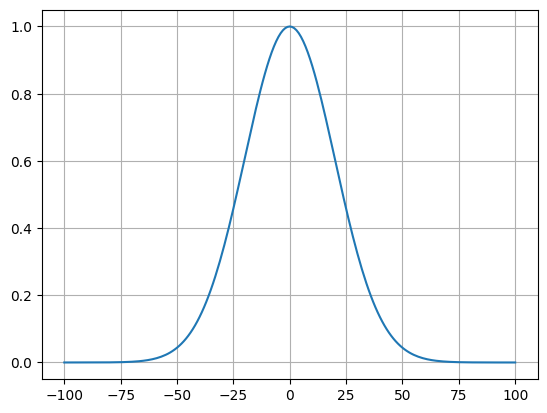

In [ ]:
plt.plot(x,y)
plt.grid(True)
plt.show()

<h2> Estudo Gerais sobre comportamento do desvio padrão na função gaussiana "normalized_rbf" </h2>


<h3> Função exponencial </h3>
<h4>
$f(x) = e^x$ <br>
$ \lim _{x \rightarrow +\infty}  f(x)   = +\infty$ <br>
$ \lim _{x \rightarrow -\infty}  f(x)   = 0$ <br>
$ f(0) = 1 $

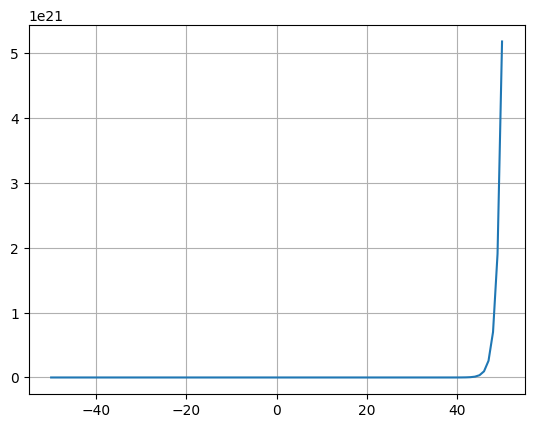

In [ ]:
def exponencial(lim_inf,lim_sup):
  x = np.linspace(lim_inf,lim_sup,2*lim_sup+1)
  y = []
  for e in x:
    y.append(np.exp(e))
  plt.plot(x,y)
  plt.grid(True)
  plt.show()

exponencial(-50,50)

In [ ]:
np.exp(0)

1.0

In [ ]:
def testa_normalized_rbf(lim_inf,lim_sup,sigma):
  x = np.linspace(lim_inf,lim_sup,2*lim_sup+1)
  centro = 0
  y = []
  for e in x:
    y.append(normalized_rbf([e],[centro],sigma))
  plt.plot(x,y)
  plt.grid(True)
  plt.show()
  print('AREA SOB A CURVA: ',np.trapz(y, x))


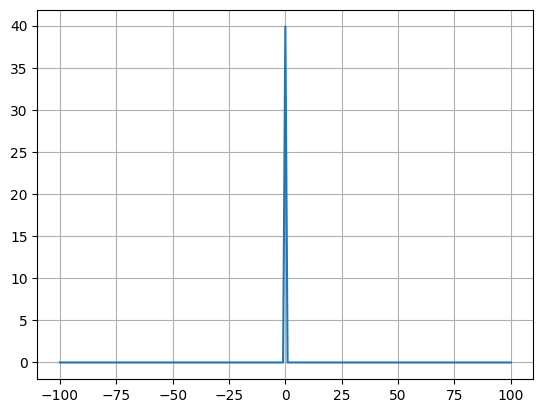

AREA SOB A CURVA:  39.894228040143275


In [ ]:
testa_normalized_rbf(-100,100,0.01)

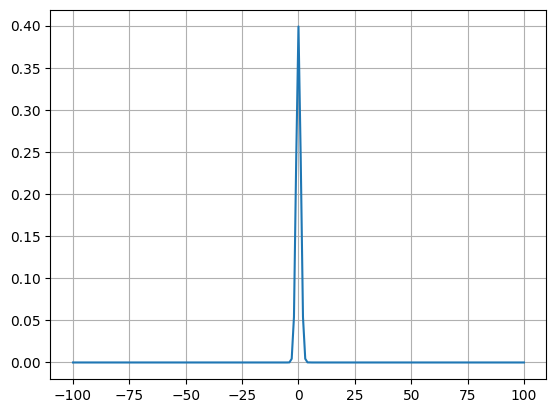

AREA SOB A CURVA:  1.000000005350576


In [ ]:
testa_normalized_rbf(-100,100,1)

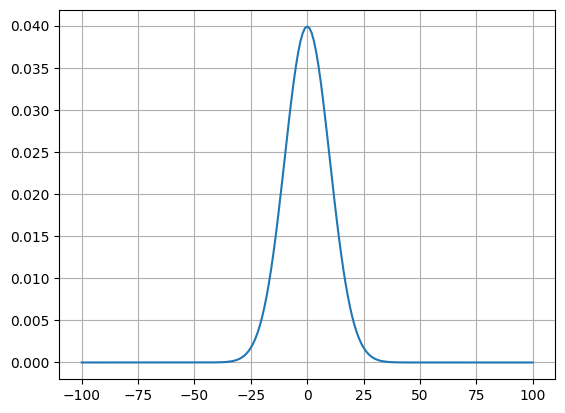

AREA SOB A CURVA:  1.0


In [ ]:
testa_normalized_rbf(-100,100,10)

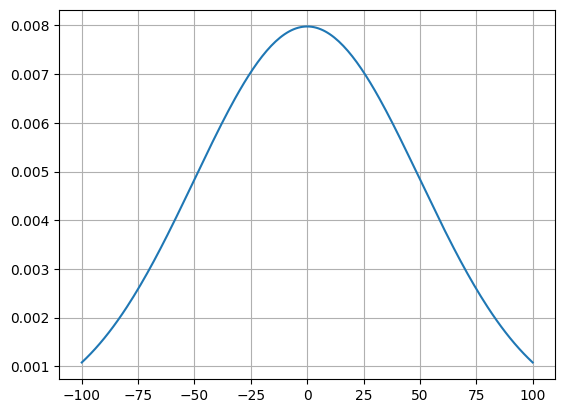

AREA SOB A CURVA:  0.9544925373561026


In [ ]:
testa_normalized_rbf(-100,100,50)

<h3> <b> O impacto e influência do desvio padrão para tarefas de classificação/regressão em gaussianas</b> </h3>

Quanto maior for o desvio padrão, maior será a variância dos pesos dos dados perto da região central, isto é, se o desvio padrão for muito baixo, somente valores muito perto do centro terão um peso considerável, já quando o desvio padrão for muito alto, valores mais distantes do centro ainda vão ter um peso considerável.

No contexto de aprendizado supervisionado, iremos usar esta função, para classificar uma classe ou prever um valor, considerando estes pesos como influência direta no cálculo final de predição e utilizando o desvio padrão para controlar o quão "perto" o algoritmo irá considerar entre as amostras.

Sendo assim, quanto maior o desvio, estaremos aumento o peso que vizinhos mais distantes receberão, e quanto menor o desvio, menor será os pesos que vizinhos distantes receberão.

 <b>Obs:</b> Os detalhes da aplicação deste peso para classificação/regressão foram discutido na primeira parte (implementação)

<h1> A Base escolhida foi: <b> Iris </b> </h1>

Como a base apresentou os melhores resultados de classificação, na utilização do algoritmo criado de Radial Basis Nearest Neighbors, iremos escolher ela para melhor demonstração dos impactos do desvio padrão nesta função

<h4> Valores extremamente pequenos </h4>

In [ ]:
acuraciaResultadosClassificador(iris,5,10**-100)

{'media_total': 0.3466666666666666,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 1e-100,
 'resultados': [{'fold': 0, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 1, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 2, 'acuracia': 0.35, 'acertos': 42},
  {'fold': 3, 'acuracia': 0.3333333333333333, 'acertos': 40},
  {'fold': 4, 'acuracia': 0.36666666666666664, 'acertos': 44}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,0.00001)

{'media_total': 0.3466666666666666,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 1e-05,
 'resultados': [{'fold': 0, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 1, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 2, 'acuracia': 0.35, 'acertos': 42},
  {'fold': 3, 'acuracia': 0.3333333333333333, 'acertos': 40},
  {'fold': 4, 'acuracia': 0.36666666666666664, 'acertos': 44}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,0.0001)

{'media_total': 0.3466666666666666,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.0001,
 'resultados': [{'fold': 0, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 1, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 2, 'acuracia': 0.35, 'acertos': 42},
  {'fold': 3, 'acuracia': 0.3333333333333333, 'acertos': 40},
  {'fold': 4, 'acuracia': 0.36666666666666664, 'acertos': 44}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,0.001)

{'media_total': 0.3466666666666666,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.001,
 'resultados': [{'fold': 0, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 1, 'acuracia': 0.3416666666666667, 'acertos': 41},
  {'fold': 2, 'acuracia': 0.35, 'acertos': 42},
  {'fold': 3, 'acuracia': 0.3333333333333333, 'acertos': 40},
  {'fold': 4, 'acuracia': 0.36666666666666664, 'acertos': 44}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,0.01)

{'media_total': 0.8666666666666668,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.01,
 'resultados': [{'fold': 0, 'acuracia': 0.8583333333333333, 'acertos': 103},
  {'fold': 1, 'acuracia': 0.8833333333333333, 'acertos': 106},
  {'fold': 2, 'acuracia': 0.8666666666666667, 'acertos': 104},
  {'fold': 3, 'acuracia': 0.8583333333333333, 'acertos': 103},
  {'fold': 4, 'acuracia': 0.8666666666666667, 'acertos': 104}]}

<h4> Valores intermediários </h4>

In [ ]:
acuraciaResultadosClassificador(iris,5,0.05)

{'media_total': 0.96,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.05,
 'resultados': [{'fold': 0, 'acuracia': 0.95, 'acertos': 114},
  {'fold': 1, 'acuracia': 0.9583333333333334, 'acertos': 115},
  {'fold': 2, 'acuracia': 0.975, 'acertos': 117},
  {'fold': 3, 'acuracia': 0.9666666666666667, 'acertos': 116},
  {'fold': 4, 'acuracia': 0.95, 'acertos': 114}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,0.1)

{'media_total': 0.96,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 0.1,
 'resultados': [{'fold': 0, 'acuracia': 0.95, 'acertos': 114},
  {'fold': 1, 'acuracia': 0.9583333333333334, 'acertos': 115},
  {'fold': 2, 'acuracia': 0.975, 'acertos': 117},
  {'fold': 3, 'acuracia': 0.9666666666666667, 'acertos': 116},
  {'fold': 4, 'acuracia': 0.95, 'acertos': 114}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,1)

{'media_total': 0.9266666666666667,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 1,
 'resultados': [{'fold': 0, 'acuracia': 0.925, 'acertos': 111},
  {'fold': 1, 'acuracia': 0.925, 'acertos': 111},
  {'fold': 2, 'acuracia': 0.9416666666666667, 'acertos': 113},
  {'fold': 3, 'acuracia': 0.925, 'acertos': 111},
  {'fold': 4, 'acuracia': 0.9166666666666666, 'acertos': 110}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,2)

{'media_total': 0.8933333333333333,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 2,
 'resultados': [{'fold': 0, 'acuracia': 0.8916666666666667, 'acertos': 107},
  {'fold': 1, 'acuracia': 0.8833333333333333, 'acertos': 106},
  {'fold': 2, 'acuracia': 0.9166666666666666, 'acertos': 110},
  {'fold': 3, 'acuracia': 0.9, 'acertos': 108},
  {'fold': 4, 'acuracia': 0.875, 'acertos': 105}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,5)

{'media_total': 0.8333333333333334,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 5,
 'resultados': [{'fold': 0, 'acuracia': 0.825, 'acertos': 99},
  {'fold': 1, 'acuracia': 0.825, 'acertos': 99},
  {'fold': 2, 'acuracia': 0.8666666666666667, 'acertos': 104},
  {'fold': 3, 'acuracia': 0.8416666666666667, 'acertos': 101},
  {'fold': 4, 'acuracia': 0.8083333333333333, 'acertos': 97}]}

Valores extremamente altos

In [ ]:
acuraciaResultadosClassificador(iris,5,10)

{'media_total': 0.47333333333333333,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 10,
 'resultados': [{'fold': 0, 'acuracia': 0.45, 'acertos': 54},
  {'fold': 1, 'acuracia': 0.4583333333333333, 'acertos': 55},
  {'fold': 2, 'acuracia': 0.5083333333333333, 'acertos': 61},
  {'fold': 3, 'acuracia': 0.475, 'acertos': 57},
  {'fold': 4, 'acuracia': 0.475, 'acertos': 57}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,50)

{'media_total': 0.0,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 50,
 'resultados': [{'fold': 0, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 1, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 2, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 3, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 4, 'acuracia': 0.0, 'acertos': 0}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,100)

{'media_total': 0.0,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 100,
 'resultados': [{'fold': 0, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 1, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 2, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 3, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 4, 'acuracia': 0.0, 'acertos': 0}]}

In [ ]:
acuraciaResultadosClassificador(iris,5,10**100)

{'media_total': 0.0,
 'qtd_amostras_treino': 120,
 'desvio_padrao': 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,
 'resultados': [{'fold': 0, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 1, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 2, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 3, 'acuracia': 0.0, 'acertos': 0},
  {'fold': 4, 'acuracia': 0.0, 'acertos': 0}]}

<h3> <b> Melhor desvio padrão </b> </h3>

Com base nos testes realizados, o melhor valor encontrado para o desvio padrão foi de 0.1

<h3> <b> Conclusão final </b> </h3>

A base iris apresenta valores de atributos de cada classe bem distintos entre si, com perceptiveis diferenças (como pode ser percebido nos gráficos abaixo) <br><br>

Sendo assim, com valores baixos de desvio padrão, o resultado de classificação tende a ser melhor, pois como a maioria dos atributos de cada classe tem um certo isolamente bem definido com os de outras classe, a priorização por valores que tenham proximidade muito alta é benéfica. Com desvio padrão baixo, ao classicar uma nova amostra, o algoritmo ira dar uma prioridade bastante local, para dados que são muito parecidos e todos os outros dados terão um peso muito baixo, e não influenciarão no resultado final

É importante notar que o desvio padrão baixo também acaba sendo bom para casos onde a separação dos dados dos atributos não é muito bem definida como ocorre com as classes "versicolor" e "virginica", justamente por fazer esta priorização local em menor escala

Para valores muito altos de desvio padrão, essa priorização local acaba se perdendo, pois os dados mais distantes da nova amostra acabam ganhando maior peso, fazendo assim com que os resultados finais apresentam inconsistência. Neste caso, a maioria dos dados vão acabar tendo um peso muito alto, gerando dificuldades em questões de classificação.




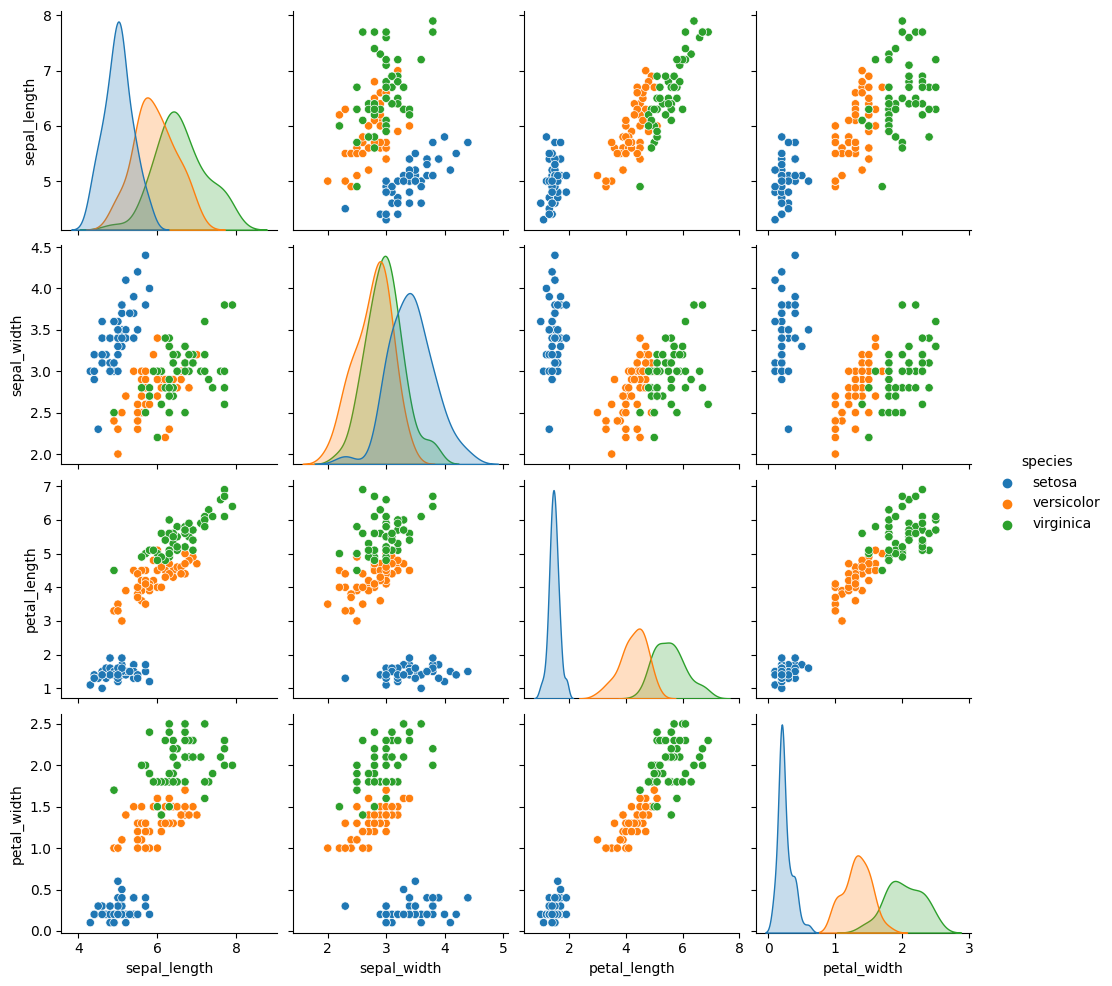

In [ ]:
sns.pairplot(iris, hue='species')
plt.show()